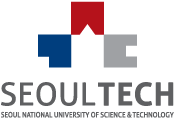

# Midterm examination
---

by Prof. Josué Obregón <br>
Data Analysis for Electronic Manufacturing <br>
Department of Data Science - SeoulTech<br>



# Instructions

You are required to work with two different datasets for this midterm examination. Load the datasets and follow the instructions provided. For each required visualization output, please write a one- or two-sentence comment explaining your findings (you may write in Korean if it is easier for you).


본 중간고사에서는 두 개의 서로 다른 데이터셋을 사용해야 합니다. 데이터셋을 불러온 후 제공된 지침에 따라 작업하세요. 각 시각화 결과에 대해, 분석 결과를 설명하는 한두 문장의 코멘트를 작성하세요. (한국어로 작성해도 무방합니다).


# Dataset 1, Steel Plate Manufacturing

You have just been hired by a steel plate manufacturing company. You have been provided with a dataset containing information on steel plate faults, classified into seven different types.

The dataset consists of 27 features describing each fault (e.g., location, size) and one feature indicating the type of fault (Class).

Your task is to perform specific data analysis, generating four visualizations and one summarization table. Each visualization will help you understand the data, and some data manipulation may be necessary before creating the visualizations.

To begin, run the first two cells to load the data.

철강 판 제조 회사에 새로 입사한 상황입니다. 철강 판의 결함을 7가지 유형으로 분류한 데이터셋을 제공받았습니다.

이 데이터셋에는 각 결함을 설명하는 27개의 특징(위치, 크기 등)과 결함 유형을 나타내는 하나의 특징(Class)이 포함되어 있습니다.

주어진 과제는 특정 데이터 분석을 수행하여 4개의 시각화와 1개의 요약 표를 생성하는 것입니다. 각 시각화는 데이터를 이해하는 데 도움이 되며, 시각화를 생성하기 전에 데이터 조작이 필요할 수 있습니다.

먼저 데이터를 불러오기 위해 첫 두 셀을 실행하세요.

In [84]:
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns

In [85]:
raw_data = fetch_openml(data_id=40982, as_frame=True, parser='pandas')
data = raw_data['frame']
data.columns = ['X_Minimum', 'X_Maximum', 'Y_Minimum','Y_Maximum','Pixels_Areas','X_Perimeter','Y_Perimeter','Sum_of_Luminosity','Minimum_of_Luminosity','Maximum_of_Luminosity','Length_of_Conveyer',
                'TypeOfSteel_A300','TypeOfSteel_A400','Steel_Plate_Thickness','Edges_Index','Empty_Index','Square_Index','Outside_X_Index','Edges_X_Index','Edges_Y_Index','Outside_Global_Index',
                'LogOfAreas','Log_X_Index','Log_Y_Index','Orientation_Index','Luminosity_Index','SigmoidOfAreas','Class']

## 1. Number of defect types and most common defect type (10 points)

The first step is to understand the response variable, which in this case is the fault type. Generate a visualization that shows the distribution of different fault types, helping you understand the number of fault types present and identifying the most common ones.

 Note: Remember to check for any null values in the data first. You may decide how to handle them, but be sure to justify your decision.
 You may also use relevant Pandas functions to assist in understanding your data.


첫 번째 단계는 응답 변수, 즉 결함 유형을 이해하는 것입니다. 결함 유형의 분포를 시각화하여 결함 유형의 수와 가장 흔한 결함이 무엇인지 파악하세요.

참고사항:

  먼저 데이터의 결측값(null values)을 확인하세요. 이를 어떻게 처리할지는 스스로 결정하되, 그 이유를 반드시 설명하세요.
  데이터를 이해하는 데 도움이 될 수 있는 Pandas 함수도 활용할 수 있습니다.

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Class                    0
dtype: int64


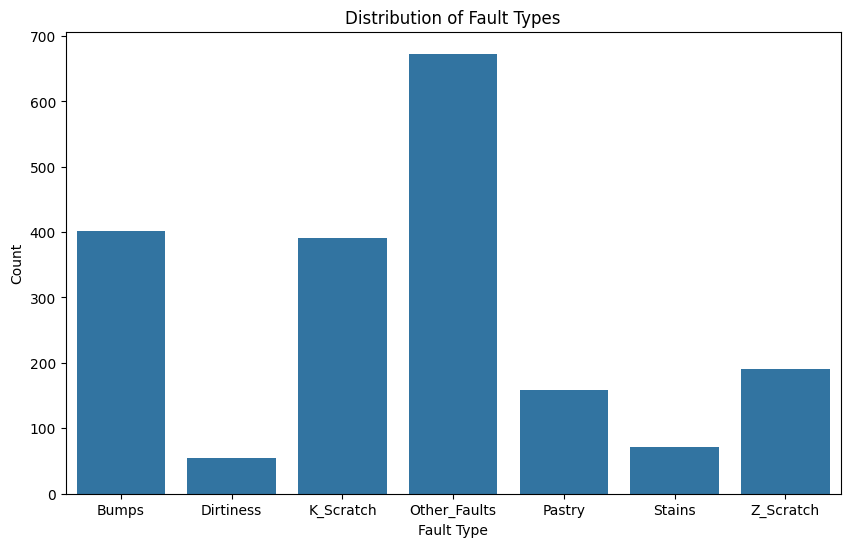

In [86]:
# Check for null values
print(data.isnull().sum())

# There are no null values in the dataset, so no handling is needed.
# nan이나 null을 체크해봤는대 존재하지 않음 처리 필요 없음
# 결함 유형 시각화
# Visualize the distribution of fault types
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fault Types')
plt.xlabel('Fault Type')
plt.ylabel('Count')
plt.show()

## 2. Understand the correlation of features (10 points)

The next step is to determine if there are highly correlated features. Create a suitable visualization to display the correlation among all features in the dataset.

Afterward, write a comment on two correlations that stand out to you (with values close to -1 or 1).

다음 단계는 높은 상관 관계를 가진 특징이 있는지 확인하는 것입니다. 데이터 내 모든 특징 간의 상관 관계를 시각화할 수 있는 적절한 시각화를 생성하세요.

이후, -1 또는 1에 가까운 값 중 주목할 만한 두 가지 상관 관계에 대해 코멘트를 작성하세요.

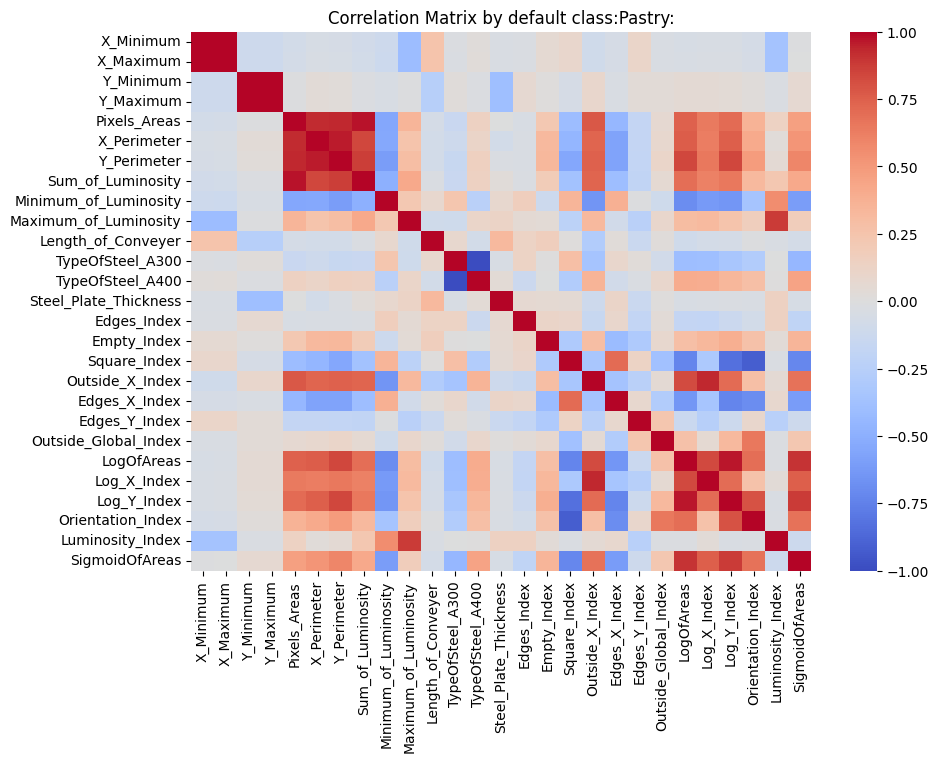

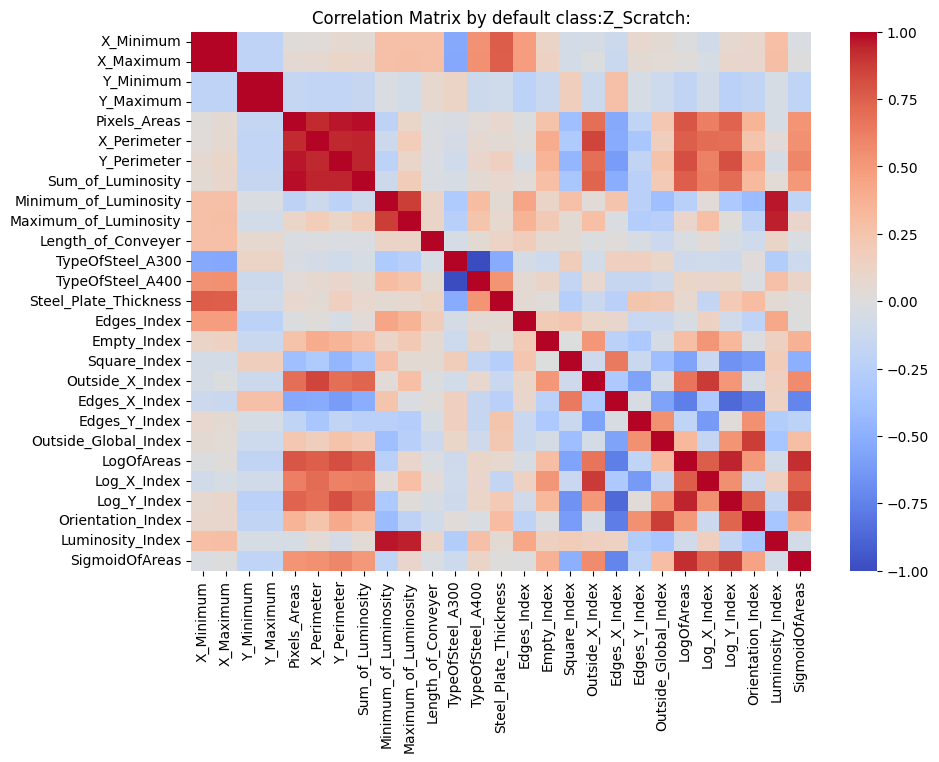

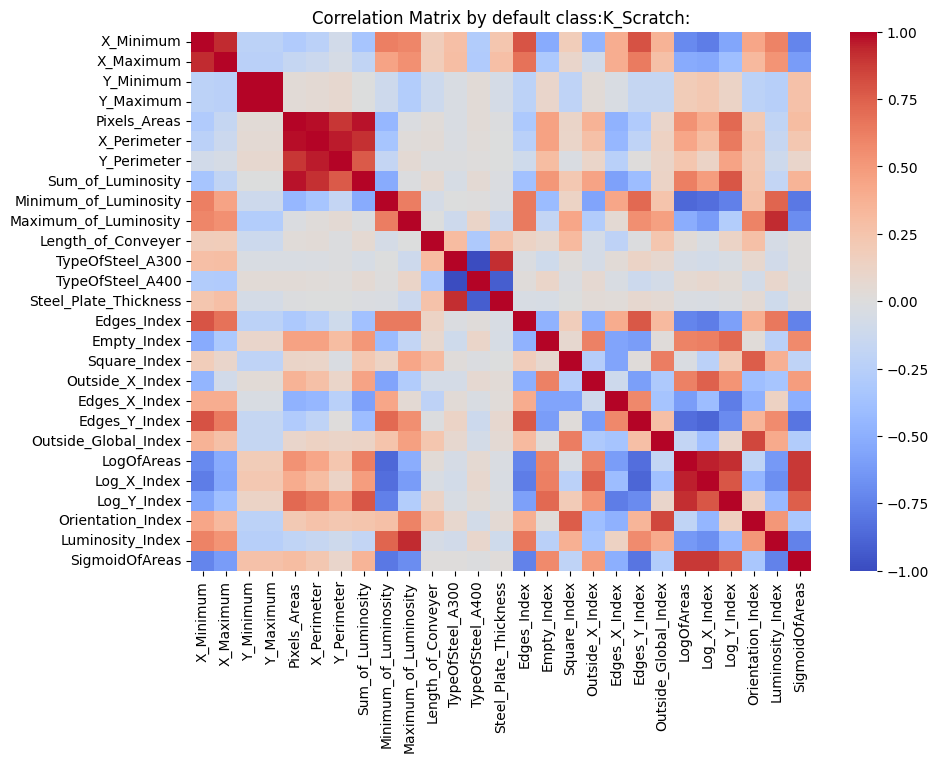

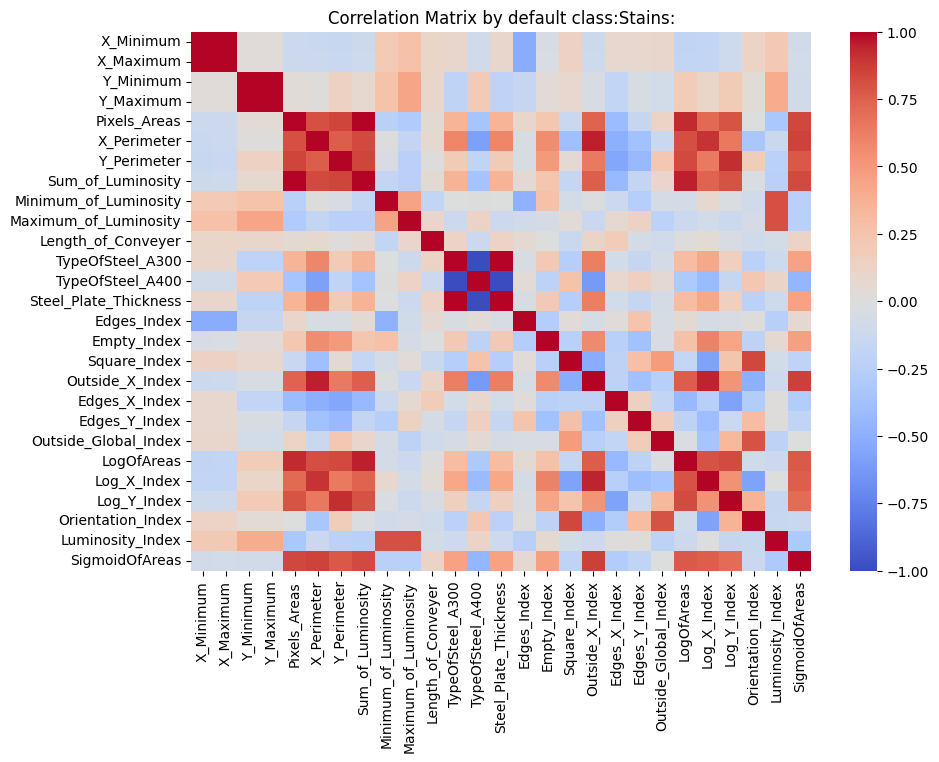

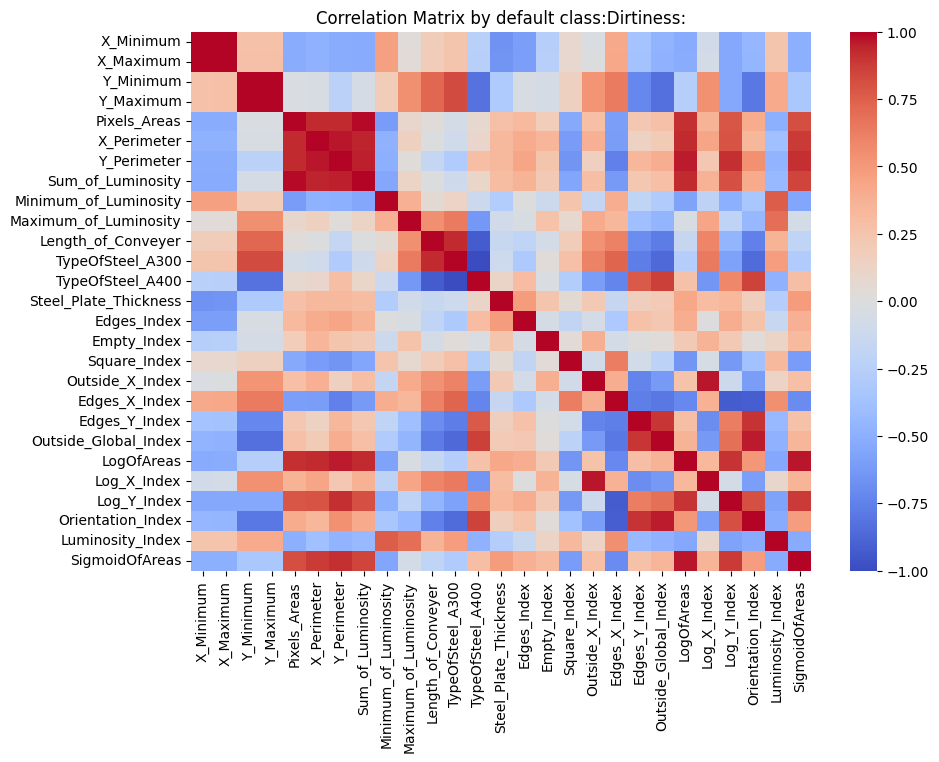

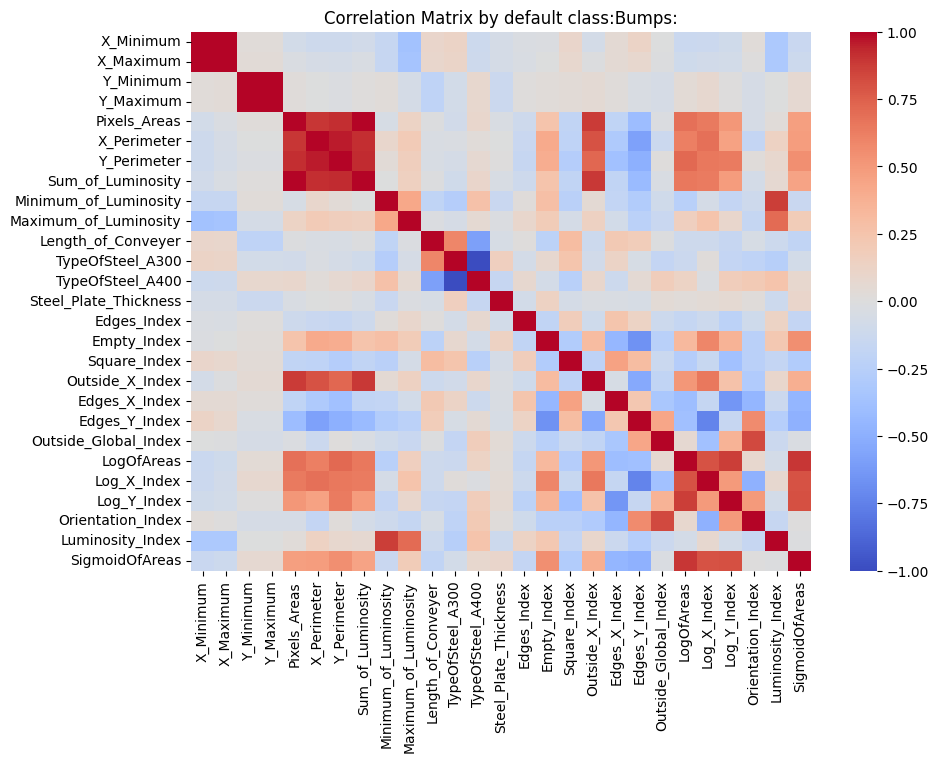

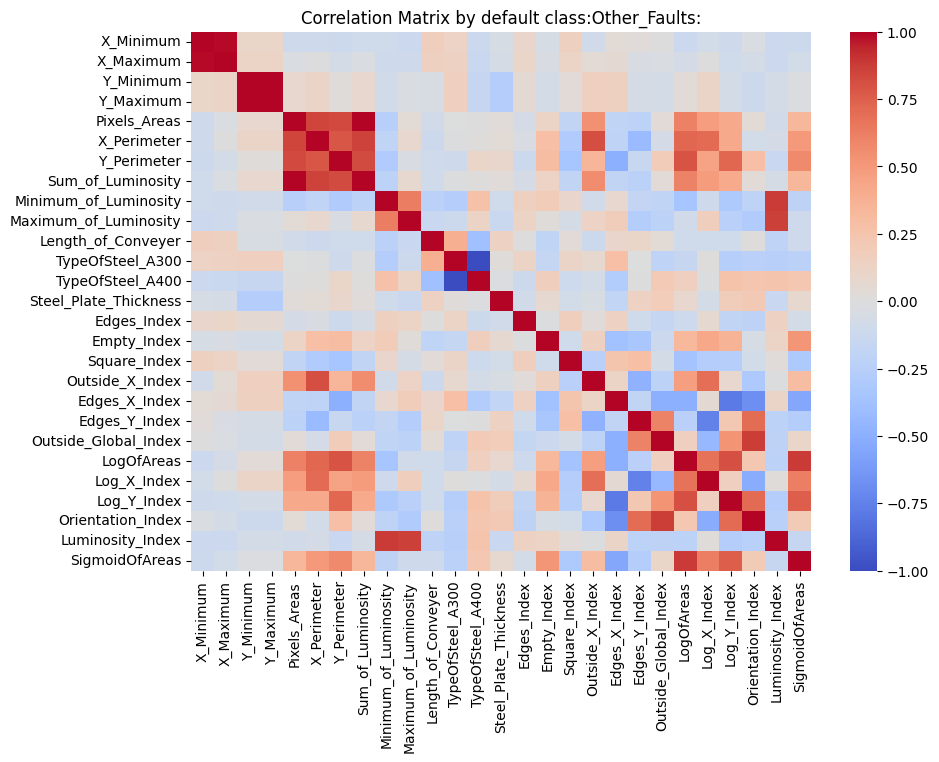

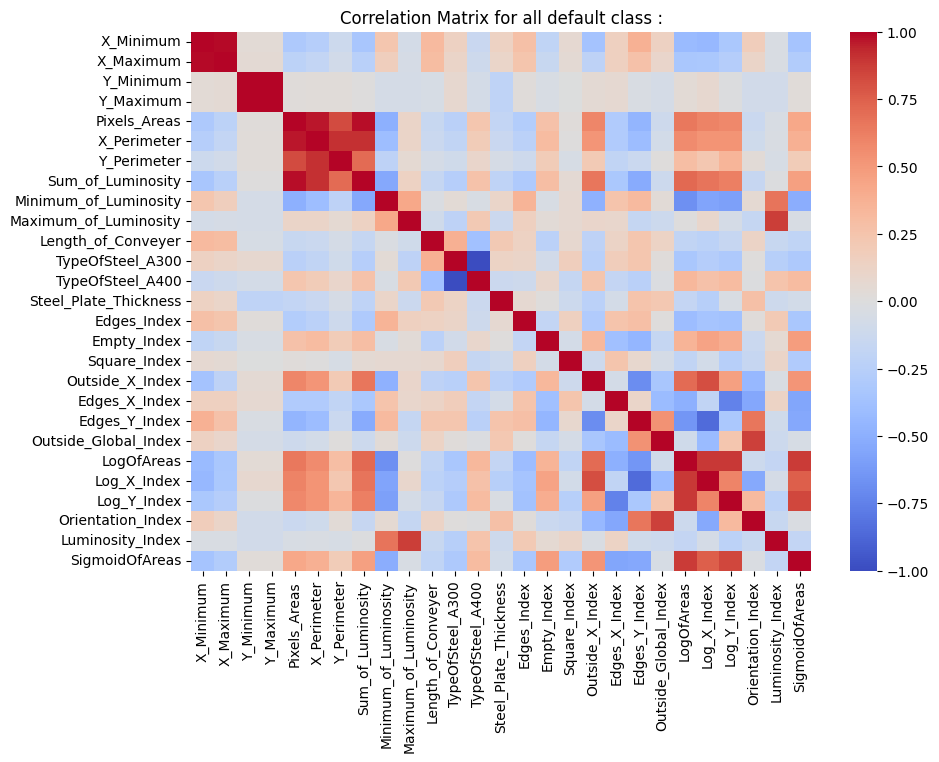

In [87]:
for default_class in data['Class'].unique():
    # class 제외
    tmp_data=data[data['Class']==default_class].drop(columns=['Class'])
    tmp_data_corr=tmp_data.corr()
    plt.figure(figsize=(10, 7))
    sns.heatmap(tmp_data_corr, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix by default class:{default_class}:')
    plt.show()

last_heatmap=data.drop(columns=['Class']).corr()
plt.figure(figsize=(10, 7))
sns.heatmap(last_heatmap, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for all default class :')
plt.show()

상관계수 식은 수치형 데이터끼리만 연산이 가능하므로, default class 별로 나누어서 실행을 해보았다. Pixels_Areas X_Perimeter Y_Perimeter Sum_of_Luminosity 간의 상관계수가 양의 방향으로 높게 나타난것으로 파악된다. LogOfAreas Log_X_Index Log_Y_Index 또한 서로 상관계수가 양의 방향으로 높다. 'TypeOfSteel_A400과'TypeOfSteel_A300', ', 'Steel_Plate_Thickness' 은 높은 음의 상관계수를 보인다. 기본적으로 default class 별로 비슷한 히트맵을 보이나, dirtiness 는 다른 class 와는 히트맵이 좀 달라 보인다.



# 3. Empty_Index feature (10 points)

Generate a visualization that helps you understand the distribution of the **Empty_Index** feature across different fault types.

**Empty_Index** 특징의 데이터 분포를 결함 유형별로 파악할 수 있는 시각화를 생성하세요.

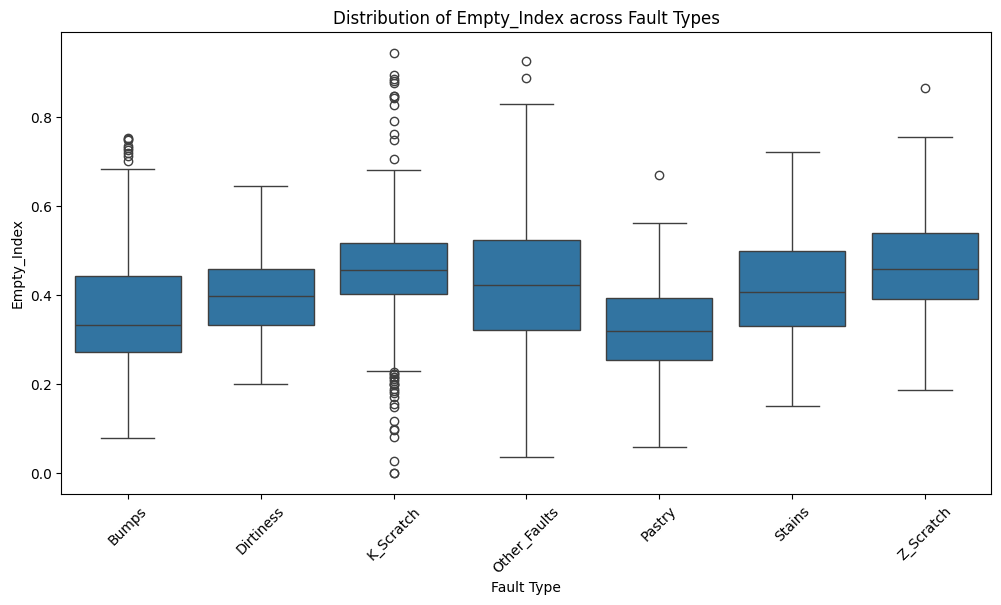

In [88]:
# Visualize the distribution of Empty_Index across different fault types
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Empty_Index', data=data)
plt.title('Distribution of Empty_Index across Fault Types')
plt.xlabel('Fault Type')
plt.ylabel('Empty_Index')
plt.xticks(rotation=45)
plt.show()

# 각 결함 유형별 Empty_Index의 분포를 확인하여 결함 유형에 따라 Empty_Index 값의 차이가 있는지 확인합니다.
# 예를 들어, 특정 결함 유형에서 Empty_Index 값이 다른 결함 유형보다 현저히 높거나 낮은 경향을 보이는지 확인할 수 있습니다

In [89]:
data['Empty_Index'].describe()


,Empty_Index
count,1941.000000
mean,0.414203
std,0.137261
min,0.000000
25%,0.315800
50%,0.412100
75%,0.501600
max,0.943900


In [90]:

# prompt: empty index의 평균,std를 defualt class 별로 묶은 피벗테이블

# Empty_Index feature의 평균과 표준편차를 Class별로 계산하여 Pivot Table 생성
pivot_table = data.pivot_table(values='Empty_Index', index='Class',observed=False, aggfunc=['mean', 'std','var','min','max'])

# 결과 출력
pivot_table

,mean,std,var,min,max
,Empty_Index,Empty_Index,Empty_Index,Empty_Index,Empty_Index
Class,,,,,
Bumps,0.367982,0.137175,0.018817,0.0781,0.7529
Dirtiness,0.404147,0.097067,0.009422,0.2000,0.6445
K_Scratch,0.457020,0.129452,0.016758,0.0000,0.9439
Other_Faults,0.423295,0.142830,0.020400,0.0368,0.9275
Pastry,0.328925,0.091824,0.008432,0.0595,0.6708
Stains,0.407042,0.134836,0.018181,0.1500,0.7208
Z_Scratch,0.468223,0.110156,0.012134,0.1875,0.8648


추가적으로 pivot table까지 만들어 봤으나 별다른 특징을 찾지는 못했다.

# 4. Relationship between Minimum of luminosity and Log of areas (10 points)

Create a plot to illustrate the relationship between two numerical features: **Minimum_of_Luminosity** and **LogOfAreas**. Color each data point according to the fault type (**Class**).

For this visualization, exclude records from the "**Other_Faults**" class.

두 개의 수치형 특징인 **Minimum_of_Luminosity**와 **LogOfAreas** 간의 관계를 보여주는 플롯을 생성하세요. 각 데이터 포인트는 결함 유형(**Class**)에 따라 색상을 달리 표시하세요.

이 시각화에서는 "**Other_Faults**" 클래스의 레코드는 제외하세요.

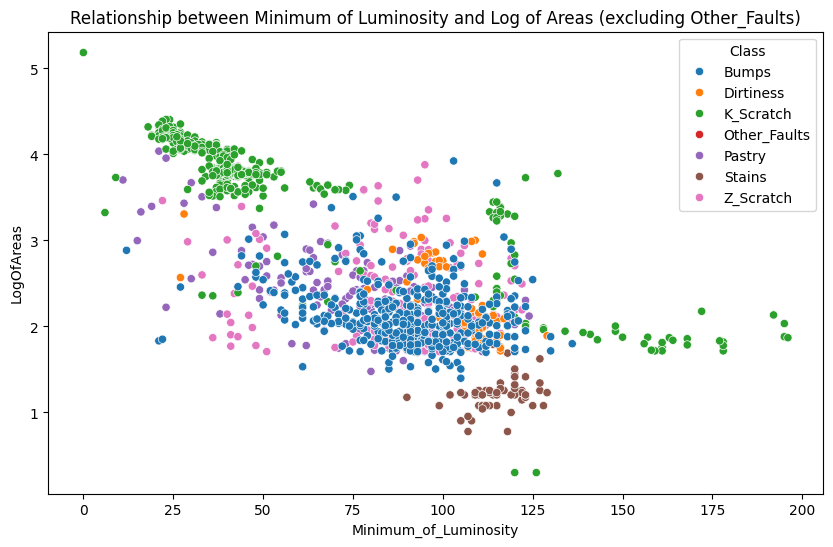

In [91]:
# Exclude "Other_Faults" class
filtered_data = pd.DataFrame(data[data['Class'] != 'Other_Faults'])

# Create the plot
plt.figure(figsize=(21, 9))
sns.scatterplot(x='Minimum_of_Luminosity', y='LogOfAreas', hue='Class', data=filtered_data)
plt.title('Relationship between Minimum of Luminosity and Log of Areas (excluding Other_Faults)')
plt.xlabel('Minimum_of_Luminosity')
plt.ylabel('LogOfAreas')
plt.show()

# Minimum_of_Luminosity와 LogOfAreas 간의 관계를 결함 유형별로 시각화하여 각 결함 유형의 특징을 파악합니다.
# Other_Faults를 제외한 데이터를 사용하여 시각화의 정확성을 높였습니다.

:. Bumps, K_Scratch, Stains가 군집화가되어 있는거로 보인다. Z_scratch와 bumps가 비슷한 값들을 가지는것으로 보인다.




# 5. Sigmoid of Areas feature (15 points)

The last output to be evaluated for this dataset is not a visualization but a table. Complete the tasks as follows:

1. Create an indicator variable for the **sigmoid of Areas** feature, where the condition is that the value is greater than 0.5.

2. Next, create a summarization table:
   - The table’s index should be the fault types.
   - The table’s columns should be the new indicator variable created in step (1).
   - The values to aggregate are **Edges_X_Index** and **Edges_Y_Index** using the median as the aggregation function.

이 데이터셋의 마지막 출력물은 시각화가 아닌 테이블입니다. 다음 작업을 수행하세요:

1. **Sigmoid of Areas** 특징에 대해 값이 0.5보다 큰 경우를 기준으로 하는 지표 변수(indicator variable)를 생성하세요.

2. 다음 요약 테이블을 만드세요:
   - 테이블의 인덱스는 결함 유형이 되어야 합니다.
   - 테이블의 열은 1단계에서 생성한 새로운 지표 변수가 되어야 합니다.
   - 집계할 값은 **Edges_X_Index**와 **Edges_Y_Index**이며, 중앙값(median)을 집계 함수로 사용하세요.



In [92]:
#변수 설정
data['SigmoidOfAreas_Indicator'] = data['SigmoidOfAreas'] > 0.5

# 피벗 테이블
summary_table = pd.pivot_table(data,
                               values=['Edges_X_Index', 'Edges_Y_Index'],
                               index='Class',
                               columns='SigmoidOfAreas_Indicator',
                               aggfunc='median')

# Display the table
summary_table

<ipython-input-92-43ed6ec156af>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  summary_table = pd.pivot_table(data,


Edges_X_Index          Edges_Y_Index        
SigmoidOfAreas_Indicator         False    True          False   True 
Class                                                                
Bumps                           0.7692  0.61540        1.0000  0.9247
Dirtiness                       0.4143  0.16160        1.0000  1.0000
K_Scratch                       0.9271  0.58700        1.0000  0.4615
Other_Faults                    0.7576  0.49470        1.0000  0.8636
Pastry                          0.6000  0.37810        1.0000  1.0000
Stains                          1.0000      NaN        1.0000     NaN
Z_Scratch                       0.6340  0.35475        0.9487  0.9099

Stains에 Nan값이 있는것으로 보아 분석시에 Stains를 판별하거나, STain 결함인지를 예측할 때 중요한 기준이 될 수 있을것 같다.


# Dataset 2, Multi-stage continuous-flow manufacturing process

You have just joined a manufacturing company specializing in continuous factory processes. You have been provided with a dataset that captures detailed information on various measurements from different stages of the factory’s production line.

The dataset includes 116 features, such as environmental conditions, raw material properties, machine temperatures, and output measurements across different process stages. Each row in the dataset represents a time-stamped entry, allowing for detailed temporal analysis of the factory’s operational conditions.

새로운 제조 회사에 입사하여 연속적인 공장 프로세스에 대한 데이터를 제공받았습니다. 이 데이터셋은 공장 생산 라인의 다양한 단계에서 발생하는 다양한 측정 값을 기록하고 있습니다.

데이터셋에는 환경 조건, 원자재 특성, 기계 온도 및 다양한 공정 단계의 출력 측정치 등 116개의 특징이 포함되어 있습니다. 각 행은 시간 스탬프가 포함된 항목을 나타내며, 공장의 운영 조건에 대한 상세한 시간 분석을 가능하게 합니다.


In [111]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("supergus/multistage-continuousflow-manufacturing-process")
print("Path to dataset files:", path)
dataset_path =  path+"/continuous_factory_process.csv"

Path to dataset files: /root/.cache/kagglehub/datasets/supergus/multistage-continuousflow-manufacturing-process/versions/2


In [112]:
data2 = pd.read_csv(dataset_path)
data2.head(5)

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


## 1. Timestamp Indexing (10 points)
   Convert the `time_stamp` column to a DateTime index. Then, resample the data to obtain hourly averages for **AmbientConditions.AmbientTemperature.U.Actual**. Generate a line plot of the resampled data.

   `time_stamp` 열을 DateTime 인덱스로 변환하세요. 그런 다음 데이터를 리샘플링하여 **AmbientConditions.AmbientTemperature.U.Actual**의 시간별 평균을 구하세요. 리샘플링한 데이터를 사용해 선 그래프를 작성하세요.


<ipython-input-123-11487ebb2f22>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  avg_temp = avg_temp['AmbientConditions.AmbientTemperature.U.Actual'].resample('H').mean()


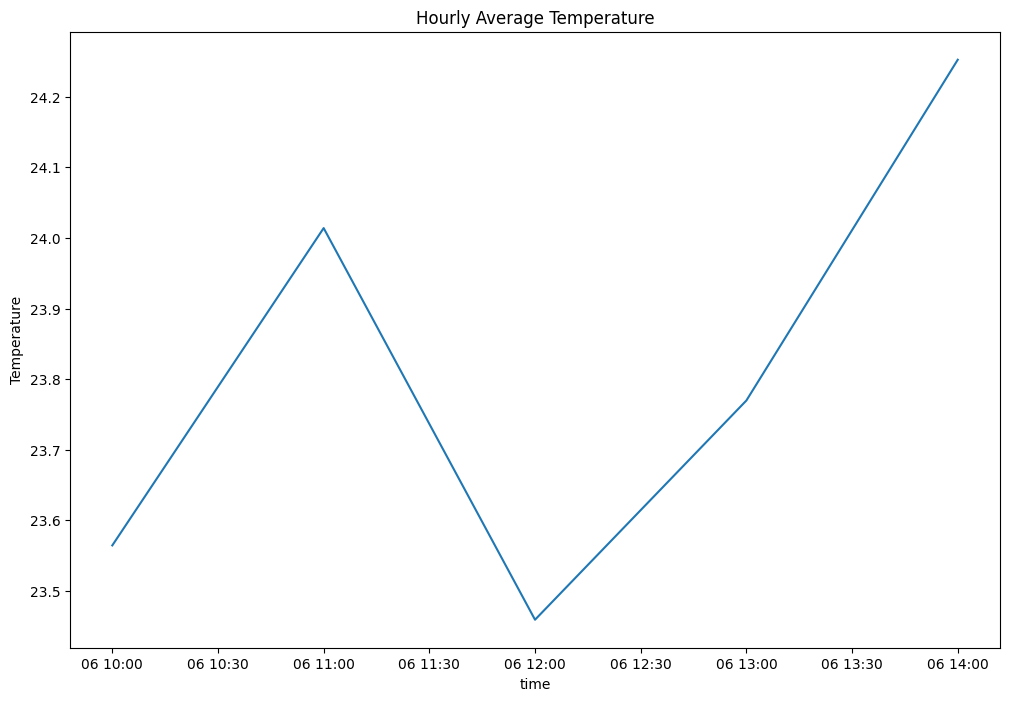

In [123]:

# Convert 'time_stamp' to DateTimeIndex
data2['time_stamp'] = pd.to_datetime(data2['time_stamp'])
avg_temp = data2.set_index('time_stamp')

# Resample to hourly averages
avg_temp = avg_temp['AmbientConditions.AmbientTemperature.U.Actual'].resample('H').mean()

# Generate line plot
plt.figure(figsize=(12, 8))
plt.plot(avg_temp)
plt.title('Hourly Average Temperature')
plt.xlabel('time')
plt.ylabel('Temperature')
plt.show()


## 2. Filtering and subsetting (10 points)
Filter the data to display only records where **Machine1.Zone1Temperature.C.Actual** is greater than 70 and **Machine1.RawMaterial.Property2** is greater than 150. How many records meet these conditions?


**Machine1.Zone1Temperature.C.Actual**이 70을 초과하고 **Machine1.RawMaterial.Property2**가 150을 초과하는 레코드만 표시하도록 데이터를 필터링하세요. 이 조건을 충족하는 레코드는 몇 개입니까?



In [124]:

filtered_data = data2[(data2['Machine1.Zone1Temperature.C.Actual'] > 70) & (data2['Machine1.RawMaterial.Property2'] > 150)]

# Count the number of records that meet the conditions
ans = len(filtered_data)

# Print the number of records
print(f"정답 : {ans}")



정답 : 14088


In [125]:
len(data2)

14088

data2의 길이와, 조건을 충족하는 길이가 같은걸 보니 조건은 filter로써의 역할을 수행하지 못하는것 같다.

## 3. Data Distribution (10 points)
   Create a histogram to visualize the distribution of **Machine1.RawMaterialFeederParameter.U.Actual**. Comment on the shape of the distribution.

**Machine1.RawMaterialFeederParameter.U.Actual**의 분포를 시각화하는 히스토그램을 생성하세요. 분포의 형태에 대해 설명하세요.

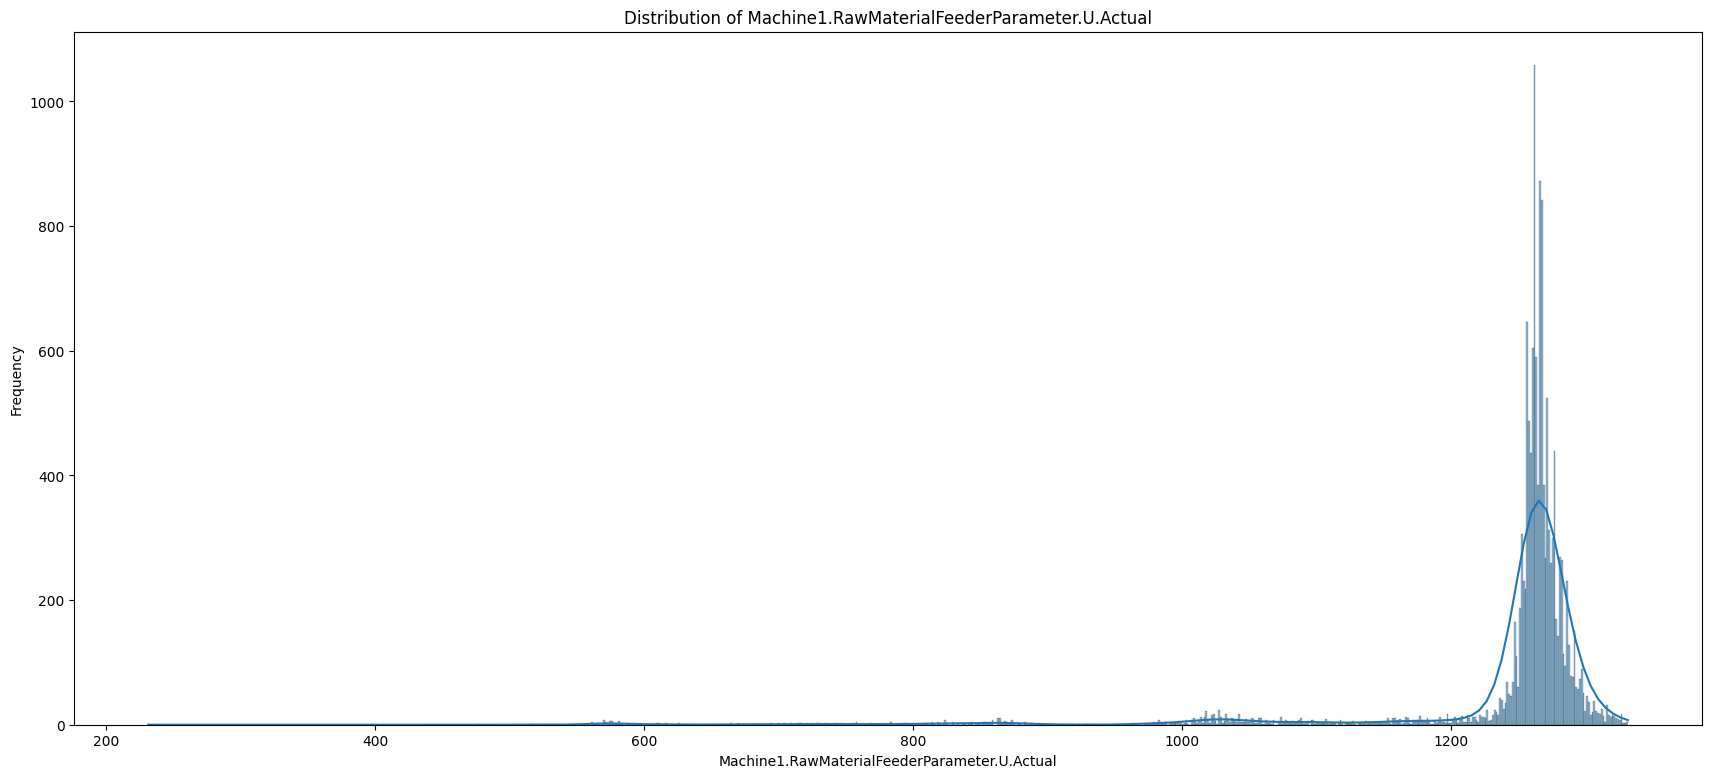

In [126]:

plt.figure(figsize=(21, 9))
sns.histplot(data2['Machine1.RawMaterialFeederParameter.U.Actual'], kde=True)
plt.title('Distribution of Machine1.RawMaterialFeederParameter.U.Actual')
plt.xlabel('Machine1.RawMaterialFeederParameter.U.Actual')
plt.ylabel('Frequency')
plt.show()

왼쪽으로 치우친 값들이 많이 보인다. 전반적으로는 정규분포를 따른다고 해도 좋을것 같으나, 왼쪽으로 치우친 이상치들이 있는 것 같다.

## 4. Rolling Mean (15 points)
   Using the **AmbientConditions.AmbientHumidity.U.Actual** column, compute a 10-minute rolling mean. Plot the rolling mean alongside the original values to observe fluctuations over time.



**AmbientConditions.AmbientHumidity.U.Actual** 열을 사용하여 10분 이동 평균을 계산하세요. 원래 값과 이동 평균을 함께 플롯하여 시간에 따른 변동을 관찰하세요.



In [ ]:
data2.index

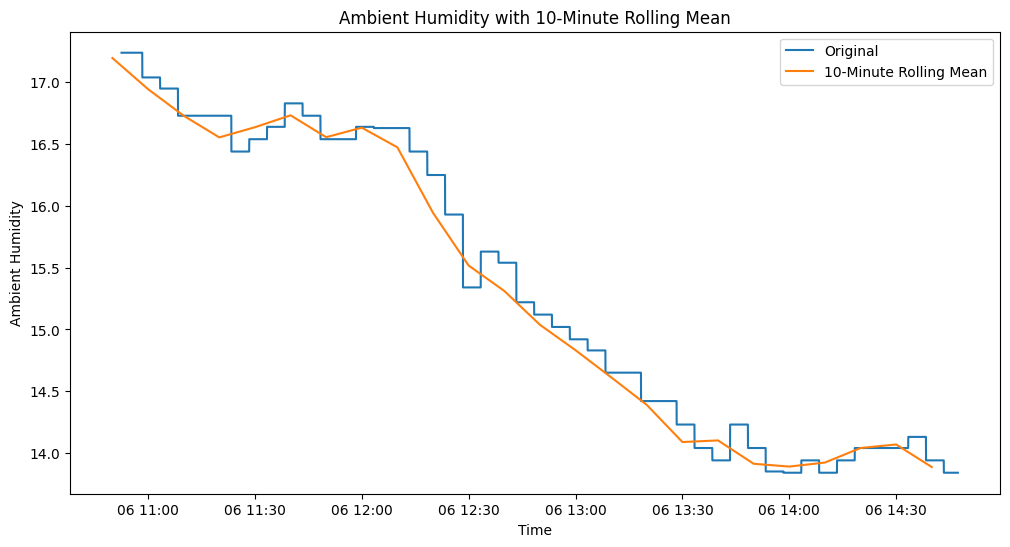

In [157]:

# Resample to 10-minute intervals and calculate the rolling mean
data2['time_stamp'] = pd.to_datetime(data2.index )
data2 = data2.set_index('time_stamp')
avg_10 = data2['AmbientConditions.AmbientHumidity.U.Actual'].resample('10min').mean().rolling(window=1).mean()

# Plot the original values and the rolling mean
plt.figure(figsize=(12, 6))
plt.plot(data2['AmbientConditions.AmbientHumidity.U.Actual'], label='Original')
plt.plot(avg_10, label='10-Minute Rolling Mean')
plt.xlabel('Time')
plt.ylabel('Ambient Humidity')
plt.title('Ambient Humidity with 10-Minute Rolling Mean')
plt.legend()
plt.show()

보다 변화하는게 부드럽다. 온도의 변화는 이산적인것이 아니라 연속적인것이므로, 10분을 window해서 graph를 그리는게 좀 더 좋아 보인다.

## Bonus Task (10 extra points)

Choose an interesting feature or set of features and create a visualization of your choice. Use your selected visualization method (e.g., histogram, scatter plot, box plot, etc.) to explore the data.

Briefly explain your findings and the reason for your choice.

학생이 흥미로운 특징 또는 특징들의 조합을 선택하여 시각화를 생성해 보세요. 본인이 선택한 시각화 방식(예: 히스토그램, 산점도, 상자 그림 등)을 사용하여 데이터를 탐색하세요.
시각화 결과와 선택 이유에 대해 간단히 설명해 주세요.